# User set : 
### `BaseDir`, `ProblemDir`, `OptionDir`', `FileIndex` ,`nSpecies`
and `Filenamebase` if needed

In [1]:
BaseDir    = '/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/'
ProblemDir = 'CS25100ms_BTr_staticFluid_CB/' # will be used as title
OptionDir  = '16X16E_1_30_LS220' 

FileIndex       = [0,100,500] # need to be a list
nSpecies        = 2

# default
FileNameBase  = '/deleptonizationwave_hdf5_chk_'
Directory     = [BaseDir + ProblemDir + OptionDir] # can be different for a list
Directory     = Directory * len(FileIndex)

## Load library, search and read-in data ...

In [2]:
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# assemble filename
[fnum, FullFileNames] \
= fyiobasis.IO_AssembleFileName(Directory,FileNameBase,FileIndex)
# read data
[Times, Energy, Radius, ZerothMoment, FirstMoment, NumberDensity, EnergyDensity, \
            FluxDensity, AverageEnergy, AverageFluxFactor, Luminosity ] \
= fyio.IO_GetMoments_n_ComputeMeanVars(FullFileNames,Directory, nSpecies)

#np.shape(ZerothMoment)

shape Times  [nfum] (3,)
shape Energy [nfum,nE] (3, 16)
shape Radius [nfum,nR] (3, 256)
shape NumbDe [nfum,nS,nR] (3, 2, 256)
shape Moment [nfum,nS,nR,nE] (3, 2, 256, 16)


# Making plots ...

<IPython.core.display.Javascript object>


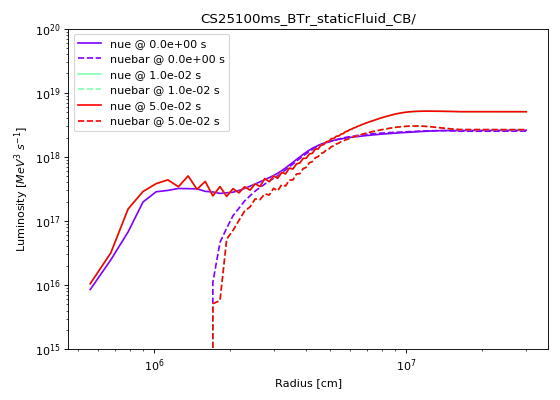

In [5]:
# luminosities
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = ['nue','nuebar']
LineType     = ['solid','dashed']
colors = cm.rainbow(np.linspace(0, 1, len(Times))) # color for times/file

fig, ax1 = plt.subplots(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel(r'Luminosity [$MeV^3$ $s^{-1}$]')

for ifile in range(fnum):
    for iS in range(nSpecies):
        ax1.plot(Radius[ifile],Luminosity[ifile][iS],\
                 linestyle=LineType[iS],color=colors[ifile],\
                 label=labels[iS]+' @ {:.1e} s'.format(Times[ifile]))
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1.0e15, 1.0e20])
ax1.tick_params(axis='y')
ax1.set_title(ProblemDir)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='best')

plt.show()